## DANDP2

####  Data Analyst Nanodegree

#### Anna Signor

<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/b/b8/Cd51-1000g.gif/1920px-Cd51-1000g.gif'>

### Introduction

This project will delineate a preliminary analysis of some data regarding the Titanic disaster. Data on 714 of the 2224 passengers aboard the vessel were examined. The project has no requirement to reach conclusions with scientific rigor, taking on instead the form of heuristic exploration, although at least one test will be performed.
The Titanic data set is very famous and many different works were published exploring it. The questions explored here will revolve around the theme of children in the Titanic. For the purposes of this text, children will be defined as individuals younger than fourteen years old. Since the remainder is not exactly what one would call "adult", they will be referred to as "non-children". 

<img src='csv_image.jpeg'>

### Data

A .csv file was provided containing the data, as shown in the image above. Preliminary investigation of the file shows that it contains, for the 891 passengers, some demographic information as well as data on the traveling itself, such as fare, ticket, cabin and others. It seems like a good way to proceed is to read it into a pandas dataframe to allow for relevant and efficient processing, calculations and visualizations. The table description that was povided is reproduced below.

### "
VARIABLE DESCRIPTIONS:


survival        Survival
                (0 = No; 1 = Yes)
                
                
pclass          Passenger Class
                (1 = 1st; 2 = 2nd; 3 = 3rd)
                
                
name            Name


sex             Sex


age             Age


sibsp           Number of Siblings/Spouses Aboard


parch           Number of Parents/Children Aboard


ticket          Ticket Number


fare            Passenger Fare


cabin           Cabin


embarked        Port of Embarkation
                (C = Cherbourg; Q = Queenstown; S = Southampton)
                
                

SPECIAL NOTES:
Pclass is a proxy for socio-economic status (SES)
 1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower

Age is in Years; Fractional if Age less than One (1)
 If the Age is Estimated, it is in the form xx.5

With respect to the family relation variables (i.e. sibsp and parch)
some relations were ignored.  The following are the definitions used
for sibsp and parch.

Sibling:  Brother, Sister, Stepbrother, or Stepsister of Passenger Aboard Titanic
Spouse:   Husband or Wife of Passenger Aboard Titanic (Mistresses and Fiances Ignored)
Parent:   Mother or Father of Passenger Aboard Titanic
Child:    Son, Daughter, Stepson, or Stepdaughter of Passenger Aboard Titanic

Other family relatives excluded from this study include cousins,
nephews/nieces, aunts/uncles, and in-laws.  Some children travelled
only with a nanny, therefore parch=0 for them.  As well, some
travelled with very close friends or neighbors in a village, however,
the definitions do not support such relations.

### "

In [1]:
##import matplotlib, pandas, seaborn, numpy
%matplotlib inline
import pandas as pd
import csv
import matplotlib.pyplot as plot
import seaborn as sns
import numpy as np

In [2]:
# read csv file into pandas dataframe
filename = r'C:/Udacity/DANDP2/titanic_data.csv'
titanic_df = pd.read_csv(filename)

### Questions

**1. What percentage of the sample were children?**
    
   Natural descriptive question to ask.
    

**2.Did children have higher chances of survival comparing with non-children?**   
    
   One would expect to see a lower fatality rate among children before any exposure to real data, for the simple fact that children are supposed to have priority in any type of disaster rescue effort.
    
**3.How were they distributed in terms of class and gender?**
    
   This is a descriptive question that will be a necessary consideration before moving on to the next question.

**4.Among children, was gender correlated to fatality rates?**
    
   This is perhaps the most interesting question. In a certain sense, the expectation is for gender to not have a perceivable effect on fatality rates in children. The reason for that is in disaster rescues of any kind, women and children are supposed to be given priority as a general guideline. Because the frasing "children" does not consider gender, one would expect to find data supporting the narrative that children of both genders were given equal priority into the life saving boats. 
   
**5.Is the (now famous) correlation between passenger class and survival observed in the children subset?**
    
Just like with question 4, in a sense one could expect to see data supporting an indepence between the two variables, since the frase "women and children first" does not mention any class division. As will be shown in this text, this proves to be a very naive expectation.

### Checking Data Integrity

It is important to check for missing or corrupted values and make determinations as to how to fix them how this affects the results. I noticed, for example, there are multiple NaNs for cabin numbers, and that the ticketing seems to have some kind of internal logic to the strings that form them, which are of yet, unknown. This work will not concern itself with such issues, since the present investigation does not rely on any of that data. Additionally, the fares maximum and minimums seemed strange, however a parallel investigation, not shown here, indicated the data is correct. 
What will be seen below, and will be of concern is the fact that some of the ages seem to be missing.

In [3]:
#check for missing or corrupted values
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB


In [4]:
#check for missing or corrupted values
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
#what is happening with the ages?
titanic_df[titanic_df['Age'].isnull()]['PassengerId'].count()

177

There are 117 records with missing ages. 

In [6]:
#take a look at some of the rows
titanic_df[titanic_df['Age'].isnull()].iloc[:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
29,30,0,3,"Todoroff, Mr. Lalio",male,NaN,0,0,349216,7.8958,NaN,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
32,33,1,3,"Glynn, Miss. Mary Agatha",female,NaN,0,0,335677,7.7500,NaN,Q
36,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C
42,43,0,3,"Kraeff, Mr. Theodor",male,NaN,0,0,349253,7.8958,NaN,C


In [7]:
titanic_df[titanic_df['Age'].isnull()].describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,177.000000,177.000000,177.000000,0,177.000000,177.000000,177.000000
mean,435.581921,0.293785,2.598870,NaN,0.564972,0.180791,22.158567
std,250.552901,0.456787,0.763216,NaN,1.626316,0.534145,31.874608
min,6.000000,0.000000,1.000000,NaN,0.000000,0.000000,0.000000
25%,230.000000,0.000000,3.000000,NaN,0.000000,0.000000,7.750000
50%,452.000000,0.000000,3.000000,NaN,0.000000,0.000000,8.050000
75%,634.000000,1.000000,3.000000,NaN,0.000000,0.000000,24.150000
max,889.000000,1.000000,3.000000,NaN,8.000000,2.000000,227.525000


The description above shows important informatio concerning the subset of data whith missing values for 'Age'. Since all the questions involve 'Age', the rows with missing values for this column are being removed, thus this part of the data will be ignored. This weakens any results produced by this analysis, however it does not invalidade them.

In [8]:
#filter out rowns where 'Age' is missing
titanic_df = titanic_df[titanic_df['Age'].notnull()]

#did it work?
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    714 non-null int64
Survived       714 non-null int64
Pclass         714 non-null int64
Name           714 non-null object
Sex            714 non-null object
Age            714 non-null float64
SibSp          714 non-null int64
Parch          714 non-null int64
Ticket         714 non-null object
Fare           714 non-null float64
Cabin          185 non-null object
Embarked       712 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 72.5+ KB


The table contains 714 rows now, with all values in 'Age', as well as the other columns that will be considered, containing non-null values. An assumption will be made that the sample of 714 remains a random sample of the population, to allow for calculations of statistical tests to take place.

### Preliminary Data Treatment

Some variable types can be modified for better understanding, to avoid the need to repeatedly consult the description. The "Survived" column will contain booleans and the "Embarked" will contain the full names of the ports. Also, the names of the passengers will be hidden. 
Since data on children will be analysed, a column called "Child" will be be created containing boolean variables, with truth values for the individuals satisfying the present definition of child and false otherwise.

In [9]:
# look at first 5 rows of table
#titanic_df.iloc[:5]
# I used this piece of code repeatedly to see if my data corrections were functioning. They are all commented out for a clean look

In [10]:
#save the names in a copy of the 'Name" series
name_series = titanic_df['Name'].copy()

#define a function to 'overwrite'
def write_over(name):
    name = 'name is hidden'
    return name

#overwrite the whole series using .apply
titanic_df['Name'] = titanic_df['Name'].apply(write_over)

Please observe that the names are stored with the same index as the rest of the data. Therefore, if for nay reason should I want to access it, the information is available. 

In [11]:
### un-comment below to see test
#titanic_df.iloc[:5]

In [12]:
# create a function to fix the port names
initials_dic = {'C':'Cherbourg', 'Q':'Queenstown', 'S':'Southampton'}
def port_name(initial):
    if initial not in initials_dic:
        return initial
    else:
        return initials_dic[initial]

In [13]:
#change all port names using .apply
titanic_df['Embarked'] = titanic_df['Embarked'].apply(port_name)

In [14]:
### un-comment below to see test
# titanic_df.iloc[:5]

In [15]:
# parse survival records as boolean values
titanic_df['Survived'] = titanic_df['Survived'].apply(bool)

In [16]:
### un-comment below to see test
# titanic_df.iloc[:5]

In [17]:
# Create a new column that informs weather or not the passenger is a child
titanic_df.loc[:,'Child'] = pd.Series(titanic_df['Age']<14)
#titanic_df.iloc[:5]

In [18]:
titanic_df_children = titanic_df[titanic_df['Child']]
titanic_df_children.iloc[:5]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Child
7,8,False,3,name is hidden,male,2,3,1,349909,21.0750,NaN,Southampton,True
10,11,True,3,name is hidden,female,4,1,1,PP 9549,16.7000,G6,Southampton,True
16,17,False,3,name is hidden,male,2,4,1,382652,29.1250,NaN,Queenstown,True
24,25,False,3,name is hidden,female,8,3,1,349909,21.0750,NaN,Southampton,True
43,44,True,2,name is hidden,female,3,1,2,SC/Paris 2123,41.5792,NaN,Cherbourg,True


In [19]:
#define a function to reverse booleans
#it will be needed to filter fatalities and non-children
#(there is probably a more elegant way to do this???)
def reverse(b):
    return not b

**1. What percentage of the sample were children?**

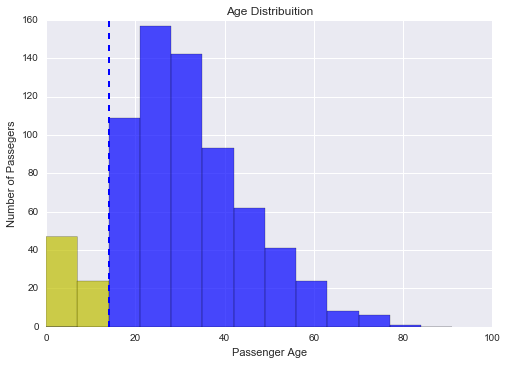

In [20]:
#show age distribuition in a histogram, showing the divide between children and non-children
agebins = [0,7,14,21,28,35,42,49,56,63,70,77,84,91]
titanic_df[titanic_df['Child']]['Age'].hist(bins=agebins,alpha = 0.7, color = 'y')
titanic_df[titanic_df['Child'].apply(reverse)]['Age'].hist(bins=agebins,alpha = 0.7, color = 'b')
plot.axvline(14, linestyle='dashed', linewidth=2) #'Child' treshold
plot.title('Age Distribuition')
plot.ylabel('Number of Passegers')
plot.xlabel('Passenger Age')

In [21]:
#count children and non children
titanic_df.groupby('Child')['Child'].count()

Child
False    643
True      71
Name: Child, dtype: int64

(-1.0605012975640129,
 1.0028716982272132,
 -1.0068985970780078,
 1.0055829808995851)

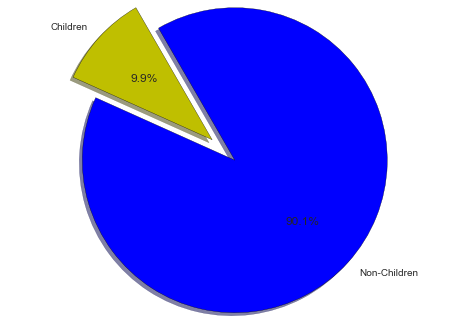

In [22]:
#show information above in a pie chart
ages_pie = [titanic_df.groupby('Child')['Child'].count().iloc[1],titanic_df.groupby('Child')['Child'].count().iloc[0]]
detach = (0.2,0)
plot.pie(ages_pie, explode = detach, shadow = True, startangle = 120, autopct='%1.1f%%', colors = ['y', 'b'], labels = ['Children', 'Non-Children'])
plot.axis('equal')



**2.Did children have higher chances of survival comparing with non-children?**

In [23]:
#compute the overall survival rate
#the survival rate is equal to the mean of 'Survived'
titanic_df['Survived'].mean()

0.4061624649859944

In [24]:
#look into the survival rate for children and non-children
#the survival rate is equal to the mean of 'Survived', and grouping by 'Child' will separate the results
titanic_df.groupby('Child', as_index = False)['Survived'].mean()

,Child,Survived
0,False,0.385692
1,True,0.591549


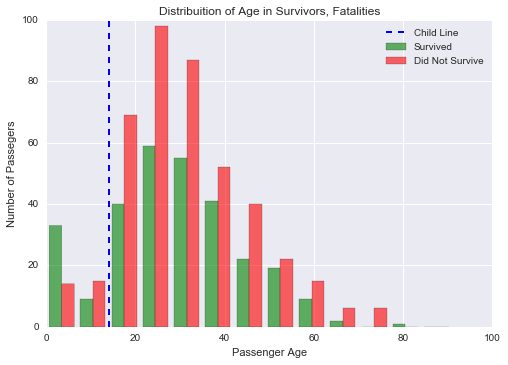

In [25]:
#histogram of survivor / fatality by age 
surv = titanic_df['Age'][titanic_df['Survived']]
fatal = titanic_df['Age'][titanic_df['Survived'].apply(reverse)]
plot.hist([surv, fatal], bins = agebins, color = ['g', 'r'], alpha = 0.6)
plot.axvline(14, linestyle='dashed', linewidth=2)
plot.title('Distribuition of Age in Survivors, Fatalities')
plot.ylabel('Number of Passegers')
plot.xlabel('Passenger Age')
plot.legend(['Child Line', 'Survived', 'Did Not Survive'])

In [26]:
surv_count = titanic_df.groupby(['Survived','Child'])['PassengerId'].count()
surv_count

Survived  Child
False     False    395
          True      29
True      False    248
          True      42
Name: PassengerId, dtype: int64

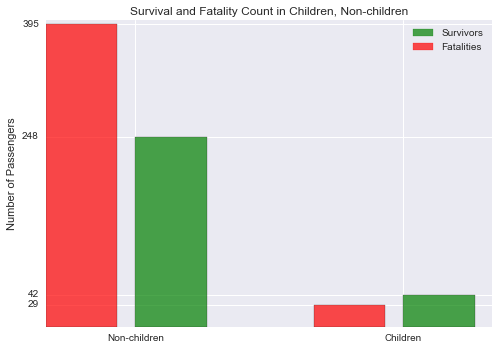

In [43]:
import matplotlib.patches as mpatches

surv_count = titanic_df.groupby(['Child','Survived'])['PassengerId'].count()
labels = ['Non-children', 'Children']
plot.bar([2,3,5,6], surv_count, color = ['r', 'g', 'r', 'g'], alpha = 0.7)
plot.xticks([3,6], labels)
plot.yticks(surv_count,surv_count)
plot.ylabel('Number of Passengers')
plot.title('Survival and Fatality Count in Children, Non-children')

red_patch = mpatches.Patch(color='red', alpha = 0.7, label='Fatalities')
green_patch = mpatches.Patch(color='green', alpha = 0.7, label='Survivors')
plot.legend(handles=[green_patch, red_patch])

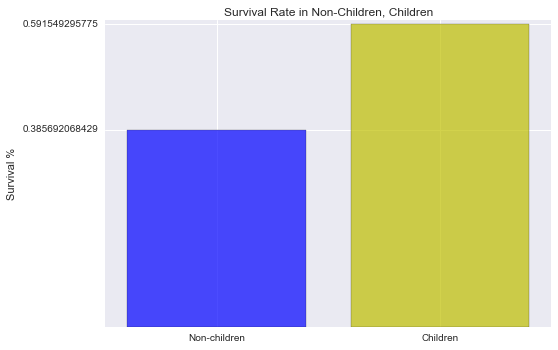

In [28]:
surv_perc = titanic_df.groupby('Child')['Survived'].mean()
labels = ['Non-children', 'Children']
plot.bar([1,2], surv_perc, color = ['b', 'y'], alpha = 0.7, align = 'center')
plot.xticks([1,2], labels)
plot.yticks(surv_perc,surv_perc)
plot.title('Survival Rate in Non-Children, Children')
plot.ylabel('Survival %')

In our sample, it seems that the survival rate is higher among children, which was expected. They compute at 40.62% overall, 38.57% for non-children, and 59.16% for children in the sample. A test is performed in the last section to answer this question in a more rigorous way.

**3.How were children distributed in terms of class and gender?**

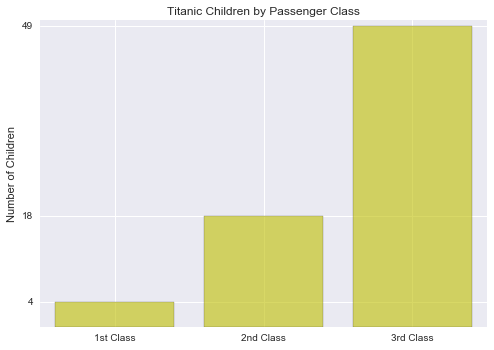

In [29]:
class_dist1 = titanic_df[titanic_df['Child']].groupby('Pclass', as_index = False)['PassengerId'].count()

l = ['1st Class', '2nd Class', '3rd Class']
plot.bar(class_dist1['Pclass'], class_dist1['PassengerId'],  align='center', alpha=0.6, color = ['y'])
plot.xticks(class_dist1['Pclass'], l)
plot.yticks(class_dist1['PassengerId'], class_dist1['PassengerId'])
plot.ylabel('Number of Children')
plot.title('Titanic Children by Passenger Class')

In [30]:
#distribuition by gender in children
gender_dist = titanic_df[titanic_df['Child']].groupby('Sex', as_index= False)['PassengerId'].count()
gender_dist

,Sex,PassengerId
0,female,34
1,male,37


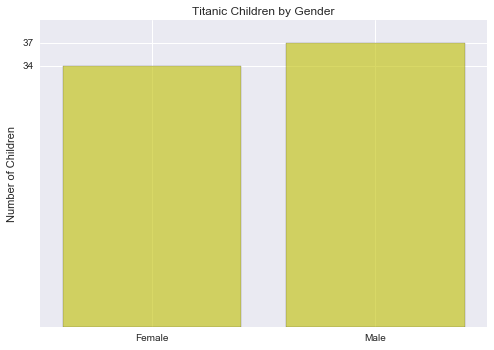

In [31]:
dist2 = titanic_df[titanic_df['Child']].groupby('Sex', as_index = False)['PassengerId'].count()
l = ['Female', 'Male']
plot.bar([1,2], dist2['PassengerId'],  align='center', alpha=0.6, color = ['y'])
plot.xticks([1,2], l)
plot.yticks(dist2['PassengerId'], dist2['PassengerId'])
plot.ylabel('Number of Children')
plot.title('Titanic Children by Gender')

**4.Among children, was gender correlated to fatality rates?**

In [32]:
#look at rates for both genders
titanic_df[titanic_df['Child']].groupby('Sex', as_index = False)['Survived'].mean()

,Sex,Survived
0,female,0.617647
1,male,0.567568


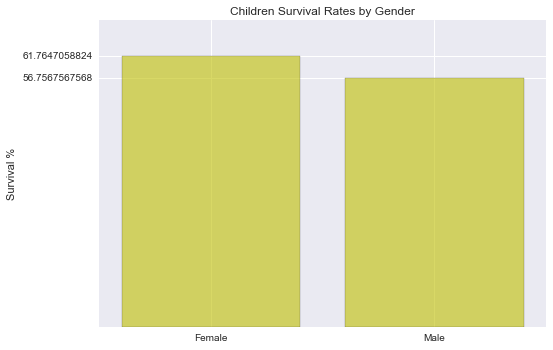

In [33]:
data_1 = titanic_df[titanic_df['Child']].groupby('Sex', as_index = False)['Survived'].mean().apply(lambda x: x*100)
l = ['Female', 'Male']
plot.bar([1,2], data_1['Survived'],  align='center', alpha=0.6, color = ['y'])
plot.xticks([1,2], l)
plot.yticks(data_1['Survived'], data_1['Survived'])
plot.ylabel('Survival %')
plot.title('Children Survival Rates by Gender')

As shown above, the survival rate in female children in the sample is 61.77% and the rate for male children in the sample is 56.76%. Although the female rate is slightly higher, on the surface of it, it doesn't seem like there is a statistically significant correlation. In order to assert that more scientifically, a statistical test will be performed in the last section of the text.

**5.Is the (now famous) correlation between passenger class and survival observed in the children subset?**

In [34]:
#show dataframe of children survival grouped by class
children_survival_by_class = titanic_df[titanic_df['Child']].groupby('Pclass', as_index = False)['Survived'].mean()
children_survival_by_class

,Pclass,Survived
0,1,0.750000
1,2,1.000000
2,3,0.428571


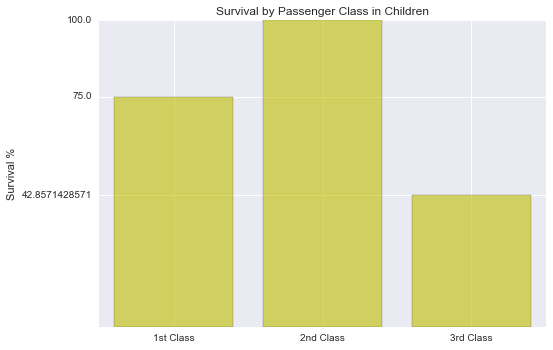

In [35]:
#visualization of above
perc = children_survival_by_class['Survived']*100
l = ['1st Class', '2nd Class', '3rd Class']
plot.bar(children_survival_by_class['Pclass'], perc,  align='center', alpha=0.6, color ='y')
plot.xticks(children_survival_by_class['Pclass'], l)
plot.yticks(perc, perc)
plot.ylabel('Survival %')
plot.title('Survival by Passenger Class in Children')

There seems so be a correlation between class and survival, even among children, as the survival rate drops several points when in the 3rd class catagory. An actual test will be performed in the next section.

### Statistical Testing

The integrity of these tests are predicated on the sample analyzed being a random sample of the Titanic passenger population, which is being assumed here. If the sample is a random sample of the population, then the subset of children in the sample is also a random sample of the subset of children in the population. This is where is it also assumed that the missing ages, that were removed, did not affect the random quality of the sample. This is a considerable assumption to make, and it does weaken the results. Further examination is encouraged, to include an investigation of the artifact that produced the missing data, thus creating the ability to properly counter it. This is beyond the scope of this work.


I understand there are library functions to calculate chi-square statistics. In this case, a choice was made to code new functions, as it seemed simpler than ensuring the library ones are indeed the ones should be used in this case. As will be seen below, they run with acceptable speed and linear algebra was favored over loops.

In [36]:
#functions in this cell will work for computation of Independence Chi Square Tests with two categorical variables
#they will numpy arrays for ease of use of lienear algebra operations 
#some said operations with numpy were referenced from this page for language and syntax

#takes a table in numpy array form, returns table of same dimention with corresponding expected values for independence
def expected(array):
    total = array.sum()
    v_total = array.sum(axis=0)
    h_total = array.sum(axis=1)
    return (np.outer(h_total, v_total))/total

#takes a table in numpy array form, returns table of same dimention with correponding normalized distances to expectation
#that is, returns ((O-E)^2)/E for each value in array
def normdist(array):
    step1 = array - expected(array)
    step2 = step1*step1
    return step2 / expected(array)

#takes a chi-table, returns list [chi-square value, degrees of freedom] finally =]
def chi_stat(array):
    chi_square_value = normdist(array).sum()
    degrees_of_freedom = (array.shape[0] - 1)*(array.shape[1] - 1)
    return [chi_square_value, degrees_of_freedom]

**Testing question 2**

The null hypothesis in this case is survival did not depend on the categorical variable child. (Using, of course, the definition of child delineated bove, that is, person under 14 years of age.) An Independence Chi-square test will be performed, for the categorical variables survival and child. Below a table will show the counts for both. 

In [37]:
#count children / non children that survived
table = titanic_df[titanic_df['Survived']].groupby('Child', as_index = False)['PassengerId'].count()
tablea = table.copy()

#count children / non-children that did not survive
table = titanic_df[titanic_df['Survived'].apply(reverse)].groupby('Child', as_index = False)['PassengerId'].count()
tableb = table.copy()

#combine information in a chi-table
surv_child_non = tablea['PassengerId']
fatal_child_non = tableb['PassengerId']
chi_surv_child_non_df = pd.DataFrame({'survivers':surv_child_non, 'fatalities': fatal_child_non})
chi_surv_child_non_df

,fatalities,survivers
0,395,248
1,29,42


In [38]:
#parse as numpy array float type, apply chi_stat
chi_surv_child_non_np = np.array(chi_surv_child_non_df.applymap(float)) 
chi_stat(chi_surv_child_non_np)

[11.234038735611614, 1L]

The critical value for this test with 1 degree of freedom is 3.841 for a significance of 0.05. Since our test statistic computed at 11.234, we may therefore conclude that the variables are, indeed, correlated. One might say that the answer to the questions is, then, is "**yes, children had a higher chance of survival, comparing with non-children**". A word of caution is uttered here, however, against any implication of causality. 

**Testing question 4**

The null hypothesis now is "among children in the Titanic, survival was independent of gender". An Independence Chi-square test will be performed, for the categorical variables survival and gender. Below a table will show the counts for both.

In [39]:
#count male / female children that survived
table = titanic_df[titanic_df['Child']][titanic_df['Survived']].groupby('Sex', as_index = False)['PassengerId'].count()
table1 = table.copy()

#count male / female children that did not survive
table = titanic_df[titanic_df['Child']][titanic_df['Survived'].apply(reverse)].groupby('Sex', as_index = False)['PassengerId'].count()
table2 = table.copy()

#organize information in one dataframe
surv_ser = table1['PassengerId']
fatal_ser = table2['PassengerId']
chi_child_surv_gender_df = pd.DataFrame({'survivers':surv_ser, 'fatalities': fatal_ser})
chi_child_surv_gender_df

C:\Users\Anna\Anaconda2\lib\site-packages\pandas\core\frame.py:1997: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "DataFrame index.", UserWarning)


,fatalities,survivers
0,13,21
1,16,21


In [40]:
#ports dataframe values to a np array, after ensuring they will be float types
chi_child_surv_gender_np = np.array(chi_child_surv_gender_df.applymap(float))

#use the function on the gender / survival table
chi_stat(chi_child_surv_gender_np)

[0.18391261443999787, 1L]

For a significance value of 0.05, with one degree of freedom (as seen above) the critical value is 3.841. The statictic obtained using the code above is 0.1839. This leads to the conclusion that we may not reject the null hypothesis. That is, **to the best of our knowledge, the survival of children in the titanic is not correlated to gender**, or at least not in a statistically significant way. This is preliminary evidence to conclude children of both genders were given equal priority into life saving vessels, although further exmination is necessary.

**Testing question 5 **

A similar analysis will be executed below, this time looking at passenger class and the survival among children. The same method as above will be employed to try to reject the null hypothesis "in children, survival was independent of passenger class".

In [41]:
#count 1st / 2nd / 3rd class children that survived
table = titanic_df[titanic_df['Child']][titanic_df['Survived']].groupby('Pclass')['PassengerId'].count()
table3 = table.copy()

#count male / female children that did not survive
table = titanic_df[titanic_df['Child']][titanic_df['Survived'].apply(reverse)].groupby('Pclass')['PassengerId'].count()
table4 = table.copy()

#organize information in one dataframe
chi_child_surv_class_df = pd.DataFrame({'survivers':[3,18,21], 'fatalities':[1,0,28]})
chi_child_surv_class_df

#I "cheated" a little bit here, as had an issue with the indexation, because the 0 for second class fatlity wouldn't show
#since the data is small, I was able to look at table 3 and table 4 and simply copy
#I am open to suggestions on how to fix this
#the results should be intact, however 

,fatalities,survivers
0,1,3
1,0,18
2,28,21


In [42]:
#ports dataframe values to a np array, after ensuring they will be float types
chi_child_surv_class_np = np.array(chi_child_surv_class_df.applymap(float))

#use the function on the gender / survival table
chi_stat(chi_child_surv_class_np)

[18.230911330049267, 2L]

The critical value in this case is 5.99, for 2 degrees of freedom. Since the code yielded a statitic test value of 18.23, the null hypothesis can be rejected and we may therefore conclude that **in children, survival was correlated to passenger class**. Once more, a word of caution regarding any causality implication.

### Conclusion

The vessel at the center of one of the most famous disasters of modern era was most definitely carrying children, who were distributed across all three passenger classes, and both genders. 
Succinctly, according to the data examined, children in the Titanic were overall more likely to survive. Considering the survival of children aboard the vessel against the categorical variables gender and class, the data supports class being correlated to survival, but not gender.
Further examination and different testing would be required to assert any causality.

### ** References **

Web pages:

1. http://www.bio.miami.edu/dana/pix/chisquare.gif

2. http://docs.scipy.org/doc/numpy-1.10.1/reference/generated/numpy.outer.html#numpy.outer

3. http://pandas.pydata.org/pandas-docs/stable/visualization.html

4. https://discussions.udacity.com/t/help-with-barplot-legend/164455